# Importing

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
hourly_data = pd.read_csv('hour.csv')

In [3]:
print(f"shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:\
 {hourly_data.isnull().sum().sum()}")

shape of data: (17379, 17)
Number of missing values in the data: 0


In [4]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


# preprocessing

## Temporal and weather features

In [5]:
preprocessed_data = hourly_data.copy()

In [6]:
season_mapping = {1:"winter" , 2:"spring" , 3:"summer", 4:"fall"}

In [7]:
preprocessed_data['season'] = preprocessed_data['season']\
.apply(lambda x : season_mapping[x])

In [8]:
yr_mapping = {0:2011, 1:2012}
preprocessed_data['yr'] = preprocessed_data.yr\
.apply(lambda x : yr_mapping[x])

In [9]:
weekday_mapping = {0:'sunday', 1:'Monday' , 2:'Tuesday',3:'Wednesday', 4:'Thursday' , 5:'Friday',6:'Saturday'}
preprocessed_data['weekday'] = preprocessed_data.weekday\
.apply(lambda x : weekday_mapping[x])

In [10]:
weather_mapping = {1:'clear', 2:'cloudy', \
                  3:'light_rain_snow', 4:'heavy_rain_snow'}
preprocessed_data['weathersit']  = preprocessed_data.weathersit\
.apply(lambda x : weather_mapping[x])

In [11]:
preprocessed_data.hum = preprocessed_data.hum * 100

In [12]:
preprocessed_data.windspeed = preprocessed_data.windspeed * 67

In [13]:
cols = ['season' , 'yr' , 'weekday' , 'weathersit' , 'hum' , 'windspeed']
preprocessed_data[cols].sample(10)

,season,yr,weekday,weathersit,hum,windspeed
2385,spring,2011,Thursday,clear,66.0,0.0000
9965,winter,2012,Saturday,cloudy,42.0,19.9995
8030,fall,2011,Tuesday,cloudy,94.0,19.0012
16234,fall,2012,Wednesday,clear,69.0,12.9980
5196,summer,2011,Tuesday,cloudy,59.0,15.0013
8271,fall,2011,Friday,cloudy,46.0,19.9995
3676,spring,2011,Tuesday,clear,73.0,6.0032
1356,winter,2011,Tuesday,clear,49.0,8.9981
5651,summer,2011,sunday,clear,69.0,7.0015
11453,spring,2012,Friday,clear,38.0,27.9993


In [14]:
"""
making sure total 
count column is the sum of registered and casual users
"""
assert (preprocessed_data.registered + preprocessed_data.casual == \
preprocessed_data.cnt).all() , 'cross field issue'

E:\Projects\Bike_sharing\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Projects\Bike_sharing\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rides distributions')

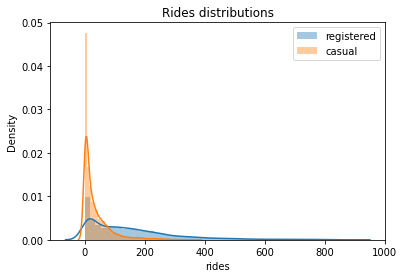

In [15]:
sns.distplot(preprocessed_data['registered'] , label='registered')
sns.distplot(preprocessed_data['casual'] , label= 'casual')
plt.legend()
plt.xlabel('rides')
plt.title('Rides distributions')

#### both casual and registered rides are right skewed indicating alot of zero or small enteries
#### we can tell for sure that registered rides are bigger in numbers

In [16]:
preprocessed_data[['registered' , 'casual' , 'dteday']]

,registered,casual,dteday
0,13,3,2011-01-01
1,32,8,2011-01-01
2,27,5,2011-01-01
3,10,3,2011-01-01
4,1,0,2011-01-01
...,...,...,...
17374,108,11,2012-12-31
17375,81,8,2012-12-31
17376,83,7,2012-12-31
17377,48,13,2012-12-31


Text(0, 0.5, 'num_rides')

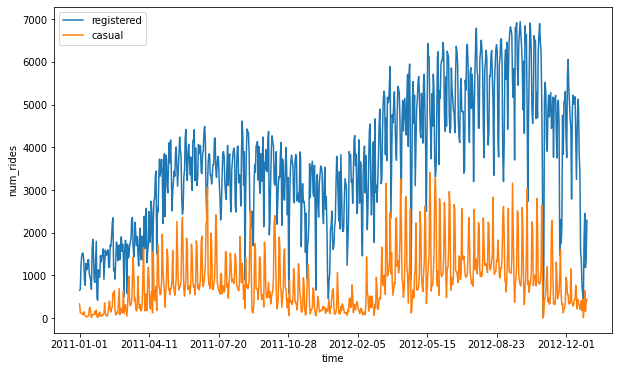

In [17]:
plot_data = preprocessed_data[['registered'  , 'casual' , 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel('time')
ax.set_ylabel('num_rides')

#### registerd rides in general are bigger than casual ones
#### both types follow the same trend and seasonality 
#### winter has a major decrease in number of rides

In [18]:
# smoothing the line charts with rolling mean and std
window = 7
plot_data = plot_data.groupby('dteday').sum()
rolling_average = plot_data.rolling(window).mean()
rolling_std = plot_data.rolling(window).std()

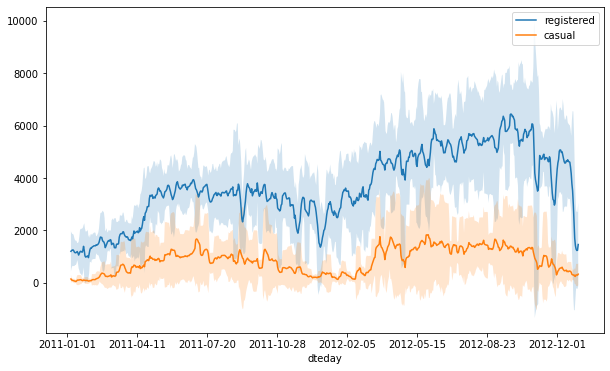

In [19]:
ax = rolling_average.plot(figsize=(10,6))
ax.fill_between(rolling_average.index ,\
                rolling_average['registered']+2*rolling_std['registered'],\
               rolling_average['registered']-2*rolling_std['registered'], alpha=0.2)
ax.fill_between(rolling_average.index ,\
                rolling_average['casual']+2*rolling_std['casual'],\
               rolling_average['casual']-2*rolling_std['casual'], alpha=0.2)

## distribution of requests over hours and day of weeks

In [20]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

In [21]:
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], \
                           var_name='type', value_name='count')
plot_data[plot_data['weekday'] == 'Sunday']

,hr,weekday,type,count


E:\Projects\Bike_sharing\env\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


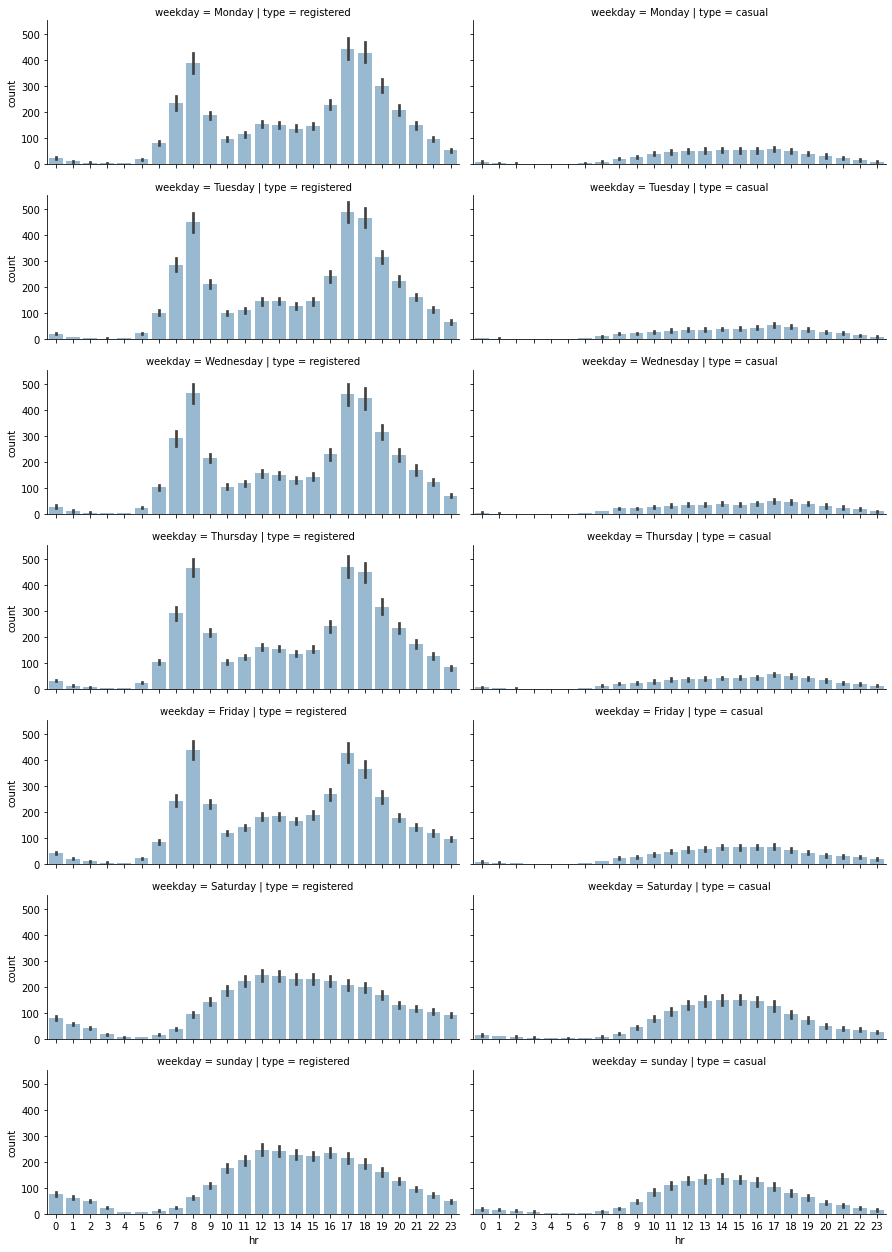

In [22]:
grid = sns.FacetGrid(plot_data, row='weekday', \
                     col='type', height=2.5, aspect=2.5, \
                     row_order=['Monday', 'Tuesday', \
                                'Wednesday', 'Thursday', \
'Friday', 'Saturday', 'sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

#### on working days from monday through friday most registered rides are between 7am-10am and 4pm-7pm which corresponds to leaving to and from work 
#### while on other days the number of rides is evenly distributed between 12 pm to 6pm as also casual rides increases dramatically which may indicated that casual riders are doing it for fun not actually as a commute vehicle for work

## Analysing seasonal impact on rides

In [26]:
preprocessed_data.season.unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [23]:
plot_data = preprocessed_data[['hr' , 'season' , 'registered' , 'casual']]

In [25]:
season_melted = plot_data.melt(id_vars=['hr' , 'season'] , var_name='type',value_name='count')

E:\Projects\Bike_sharing\env\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


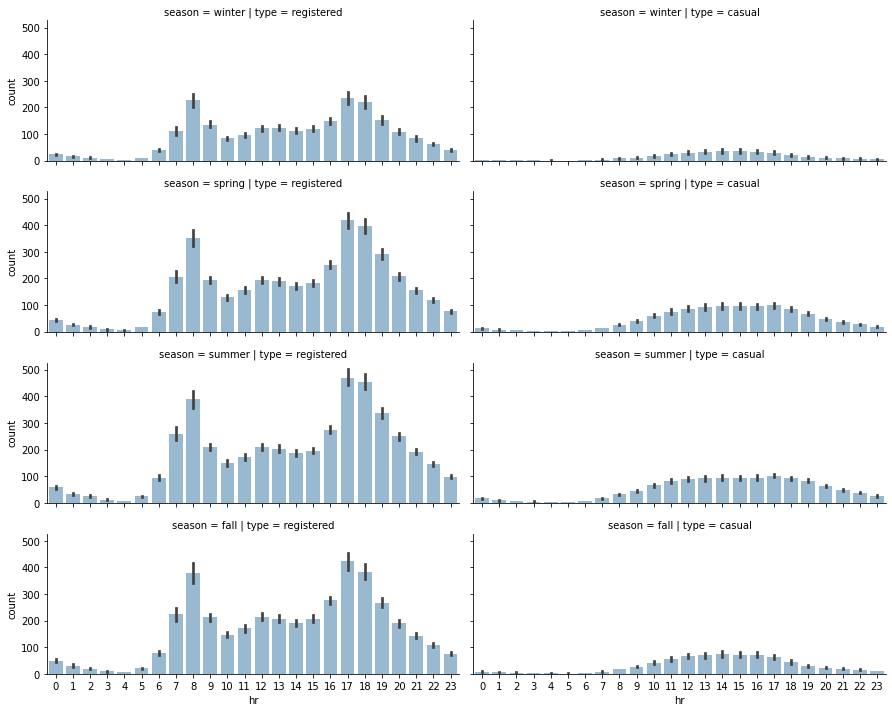

In [29]:
grid = sns.FacetGrid(season_melted , row='season'\
                    ,col='type', row_order=['winter' ,'spring' ,'summer', 'fall' ], height=2.5, \
                     aspect=2.5)
grid.map(sns.barplot , 'hr' , 'count', alpha=0.5)

In [30]:
plot_data = preprocessed_data[['weekday' , 'season' , 'registered' , 'casual']]

In [32]:
season_wkday = plot_data.melt(id_vars=['weekday' , 'season'] , var_name='type',value_name='count')

In [36]:
season_wkday

,weekday,season,type,count
0,Saturday,winter,registered,13
1,Saturday,winter,registered,32
2,Saturday,winter,registered,27
3,Saturday,winter,registered,10
4,Saturday,winter,registered,1
...,...,...,...,...
34753,Monday,winter,casual,11
34754,Monday,winter,casual,8
34755,Monday,winter,casual,7
34756,Monday,winter,casual,13


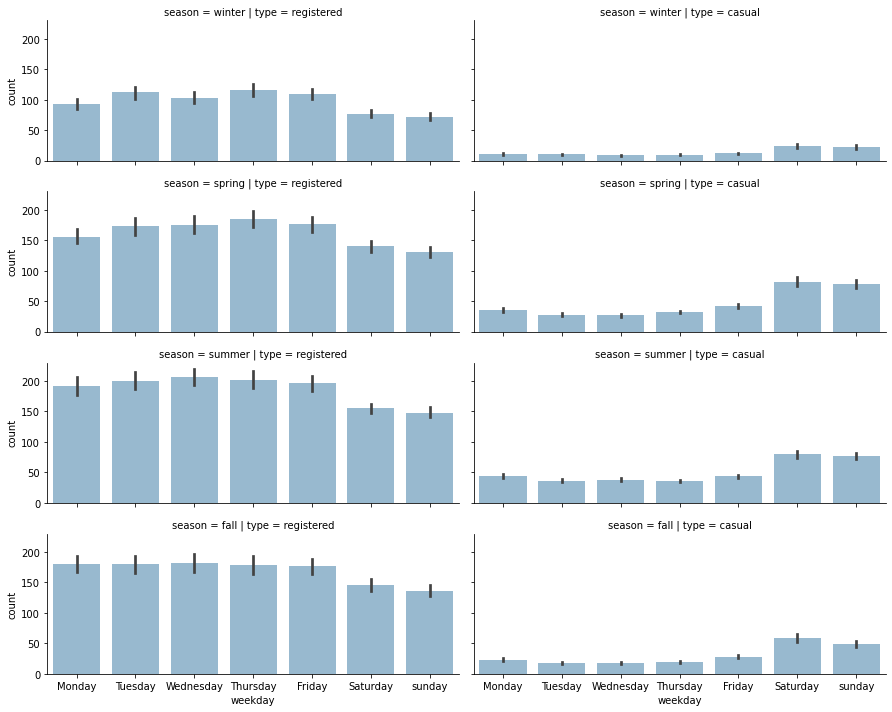

In [39]:
grid = sns.FacetGrid(season_wkday , row='season'\
                    ,col='type', row_order=['winter' ,'spring' ,'summer', 'fall' ], height=2.5, \
                     aspect=2.5)
grid.map(sns.barplot , 'weekday' , 'count', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
                'Friday', 'Saturday', 'sunday'],alpha=0.5)

#### using our analysis so far we deduce that registered users are using rides for commuting so that rides over weekends are decreasing while casual users are using rides for fun activities which we will try to prove on our hypothesis testing

# Hypotheis Testing

In [41]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()
population_mean

153.78686920996606

In [42]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season \
                            == "summer") \
& (preprocessed_data.yr \
== 2011)].registered

In [43]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, \
p-value: {test_result[1]}")

Test statistic: -3.491969148378619, p-value: 0.0004887645279519517


In [44]:
sample.mean()

144.73214285714286

In [47]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, \
 population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, \
p-value: {test_result_unbiased[1]}")

Unbiased test statistic: 0.48058215221395456, p-value: 0.6309346025660401


In [48]:
sample_unbiased.mean()

156.29113924050634